In [47]:
import numpy as np
from array import array
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [48]:
dirin='/home/rdavis39/CLIM470/CLIM-470-Numerical-Weather-Prediction/Project/'
zDfil='midgeopot.dat'
uDfil='miduwind.dat'
vDfil='midvwind.dat'
topo_file = "midtopo.dat"

In [49]:
ntime=3
nx=24
ny=8
recl=(nx*ny)*4
z_bin=np.zeros((ntime,nx,ny))
u_bin=np.zeros((ntime,nx,ny))
v_bin=np.zeros((ntime,nx,ny))
topo_bin=np.zeros((ny,nx))

In [50]:
ds_topo_bin = open(dirin+topo_file,'rb')

tmp = ds_topo_bin.read(recl)
tmp1 = array('f',tmp)
#tmp2=tmp1[1:-1] #for fortran sequential
ds_topo_bin=np.reshape(tmp1,(ny,nx))

In [51]:
ds_z_bin = open(dirin+zDfil,'rb')
for t in range(ntime):
    tmp = ds_z_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    z_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_z_bin,tmp,tmp1

In [52]:
ds_u_bin = open(dirin+uDfil,'rb')
for t in range(ntime):
    tmp = ds_u_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    u_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_u_bin,tmp,tmp1

In [53]:
ds_v_bin = open(dirin+vDfil,'rb')
for t in range(ntime):
    tmp = ds_v_bin.read(recl)
    tmp1 = array('f',tmp)
    #tmp2=tmp1[1:-1] #for fortran sequential
    v_bin[t,:,:]=np.reshape(tmp1,(nx,ny))
del ds_v_bin,tmp,tmp1

In [54]:
# calculate time mean
z_bin_mean = z_bin.mean(axis=0)
u_bin_mean = u_bin.mean(axis=0)
v_bin_mean = v_bin.mean(axis=0)

Text(0.5, 1.0, 'gh snapshot')

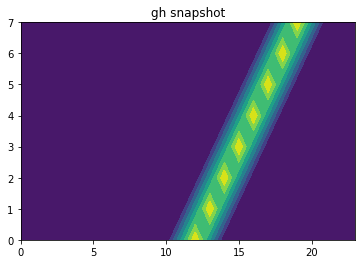

In [55]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contourf(ds_topo_bin)
ax.set_title('gh snapshot')

Text(0.5, 1.0, 'Time avg')

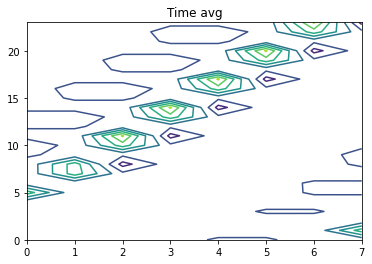

In [56]:
# plot the time average 
fig, ax = plt.subplots()
zc = ax.contour(z_bin_mean)
ax.set_title('Time avg')

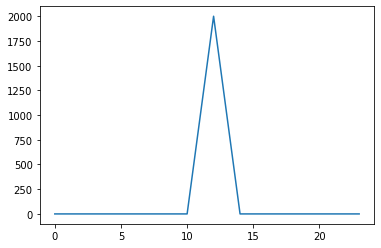

In [57]:
fig, ax = plt.subplots()
zc = ax.plot(ds_topo_bin[0,:])

Text(0.5, 1.0, 'gh snapshot')

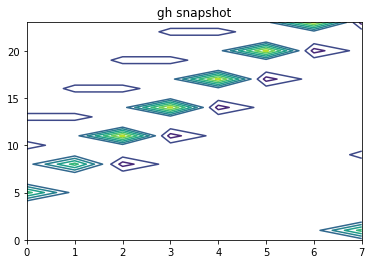

In [58]:
# plot one time 
fig, ax = plt.subplots()
zc = ax.contour(z_bin[-1,:,:])
ax.set_title('gh snapshot')

Text(0.5, 1.0, 'gh time mean')

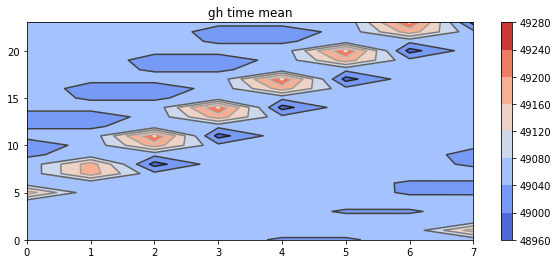

In [59]:
# plot filled contours
fig, ax = plt.subplots(figsize=(10,4))
zc = ax.contourf(z_bin_mean,cmap=cm.coolwarm)
plt.colorbar(zc)

# plot the contour lines using gray lines
zl = ax.contour(z_bin_mean,cmap=cm.gray)
ax.set_title('gh time mean')

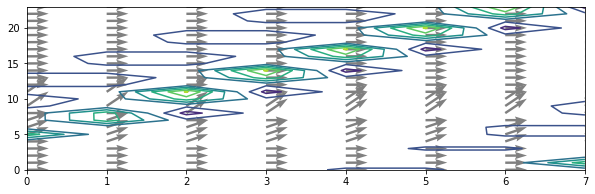

In [60]:
# Plot gh and wind vectors
fig, ax = plt.subplots(figsize=(10,3))
zc = ax.contour(z_bin_mean)
skip=(slice(None, None, 3), slice(None, None, 3))
x=np.arange(nx)
y=np.arange(ny)
zc = ax.quiver(u_bin_mean, v_bin_mean,color='grey')


In [61]:
u_bin_mean[:,:]

array([[19.94666545, 19.94666545, 19.94666545, 19.94666545, 19.94666545,
        19.94666545, 19.94666545, 19.94666545],
       [19.94666545, 19.94666545, 19.94666545, 19.94666545, 19.94666545,
        19.94666545, 19.94666545, 19.94666545],
       [19.94666545, 19.94666545, 19.94666545, 19.94666545, 19.94666545,
        19.94666545, 19.94666545, 19.94666545],
       [19.94666545, 19.94666545, 19.94666545, 19.94666545, 19.94666545,
        19.94666545, 19.94666545, 19.94666545],
       [19.94666545, 19.89333089, 19.89333089, 19.89333089, 19.89333089,
        19.89333089, 19.89333089, 19.89333089],
       [19.89333089, 19.89333089, 19.89333089, 19.89333089, 19.89333089,
        19.89333089, 19.89333089, 19.89333089],
       [19.89333089, 19.89333089, 19.89333089, 19.89333089, 19.89333089,
        19.89333089, 19.89333089, 19.89333089],
       [19.89333089, 19.89333089, 19.89333089, 19.89333089, 19.89333089,
        19.89333089, 19.89333089, 19.89333089],
       [19.89333089, 19.89333089

In [62]:
v_bin_mean[:,:]

array([[ 0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
         0.1       ,  0.1       ,  0.1       ],
       [ 0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
         0.1       ,  0.1       ,  0.1       ],
       [ 0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
         0.1       ,  0.1       ,  0.1       ],
       [ 0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
         0.1       ,  0.1       ,  0.1       ],
       [ 0.1       ,  6.66666768,  6.66666768,  6.66666768,  6.66666768,
         6.66666768,  6.66666768,  6.66666768],
       [ 6.66666768,  6.66666768,  6.66666768,  6.66666768,  6.66666768,
         6.66666768,  6.66666768,  6.66666768],
       [ 6.66666768,  6.66666768,  6.66666768,  6.66666768,  6.66666768,
         6.66666768,  6.66666768,  6.66666768],
       [ 6.66666768,  6.66666768,  0.1       ,  0.1       ,  0.1       ,
         0.1       ,  0.1       ,  0.1       ],
       [ 0.1       ,  0.1       